In [3]:
import pandas as pd

In [4]:
pd.read_csv(r'D:\BaiduNetdiskDownload\day4\survey_visited.csv')

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


# 加载数据，不包含默认缺失值


In [ ]:
pd.read_csv(r'D:\BaiduNetdiskDownload\day4\survey_visited.csv',keep_default_na= False)

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


# 加载数据，手动指定缺失值


In [33]:
pd.read_csv(r'D:\BaiduNetdiskDownload\day4\survey_visited.csv',keep_default_na= False,na_values=[""])

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [7]:
train=pd.read_csv(r'D:\BaiduNetdiskDownload\day4\titanic_train.csv')
test=pd.read_csv(r'D:\BaiduNetdiskDownload\day4\titanic_test.csv')

In [8]:
train.shape
test.shape
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
train.isnull().sum() # 查看每列缺失值个数

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train.isnull().sum()/train.shape[0]#缺失率

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# train_missing=missing_values_table(train)

In [14]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import missingno as msno

<Axes: >

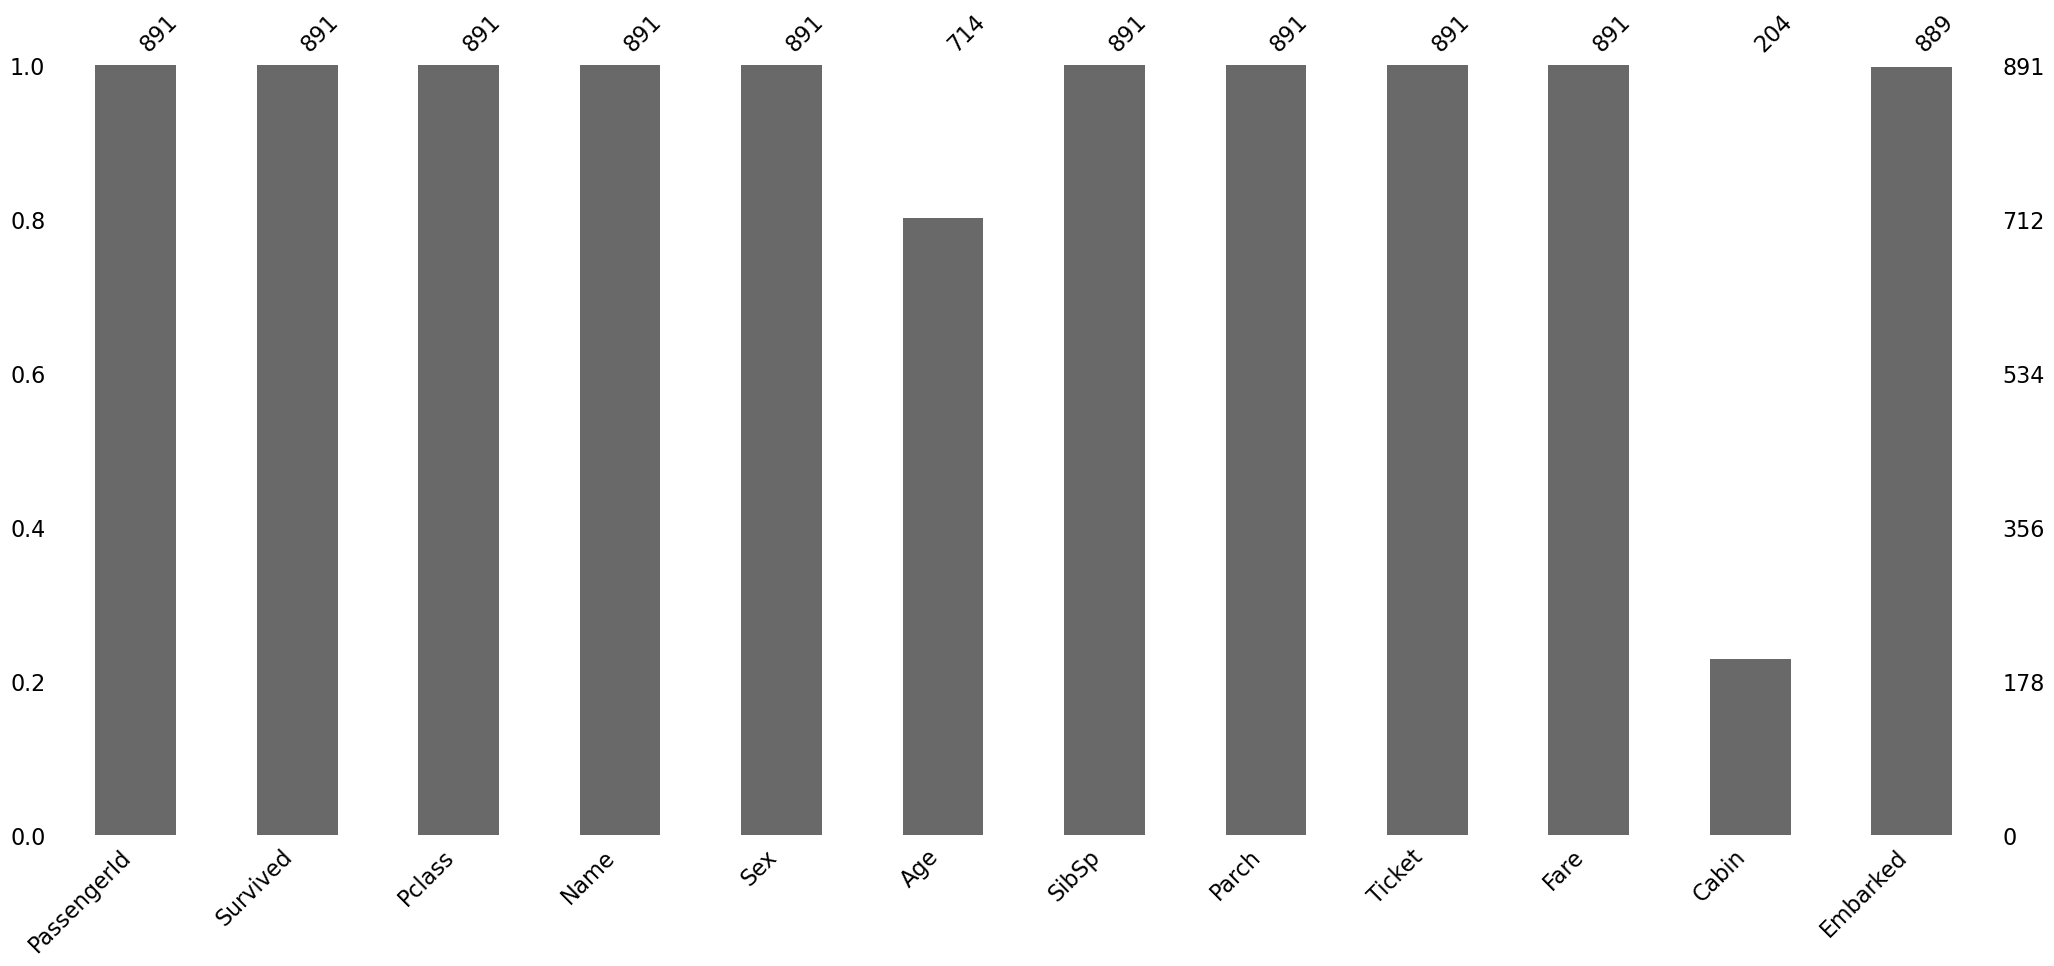

In [16]:
msno.bar(train)

<Axes: >

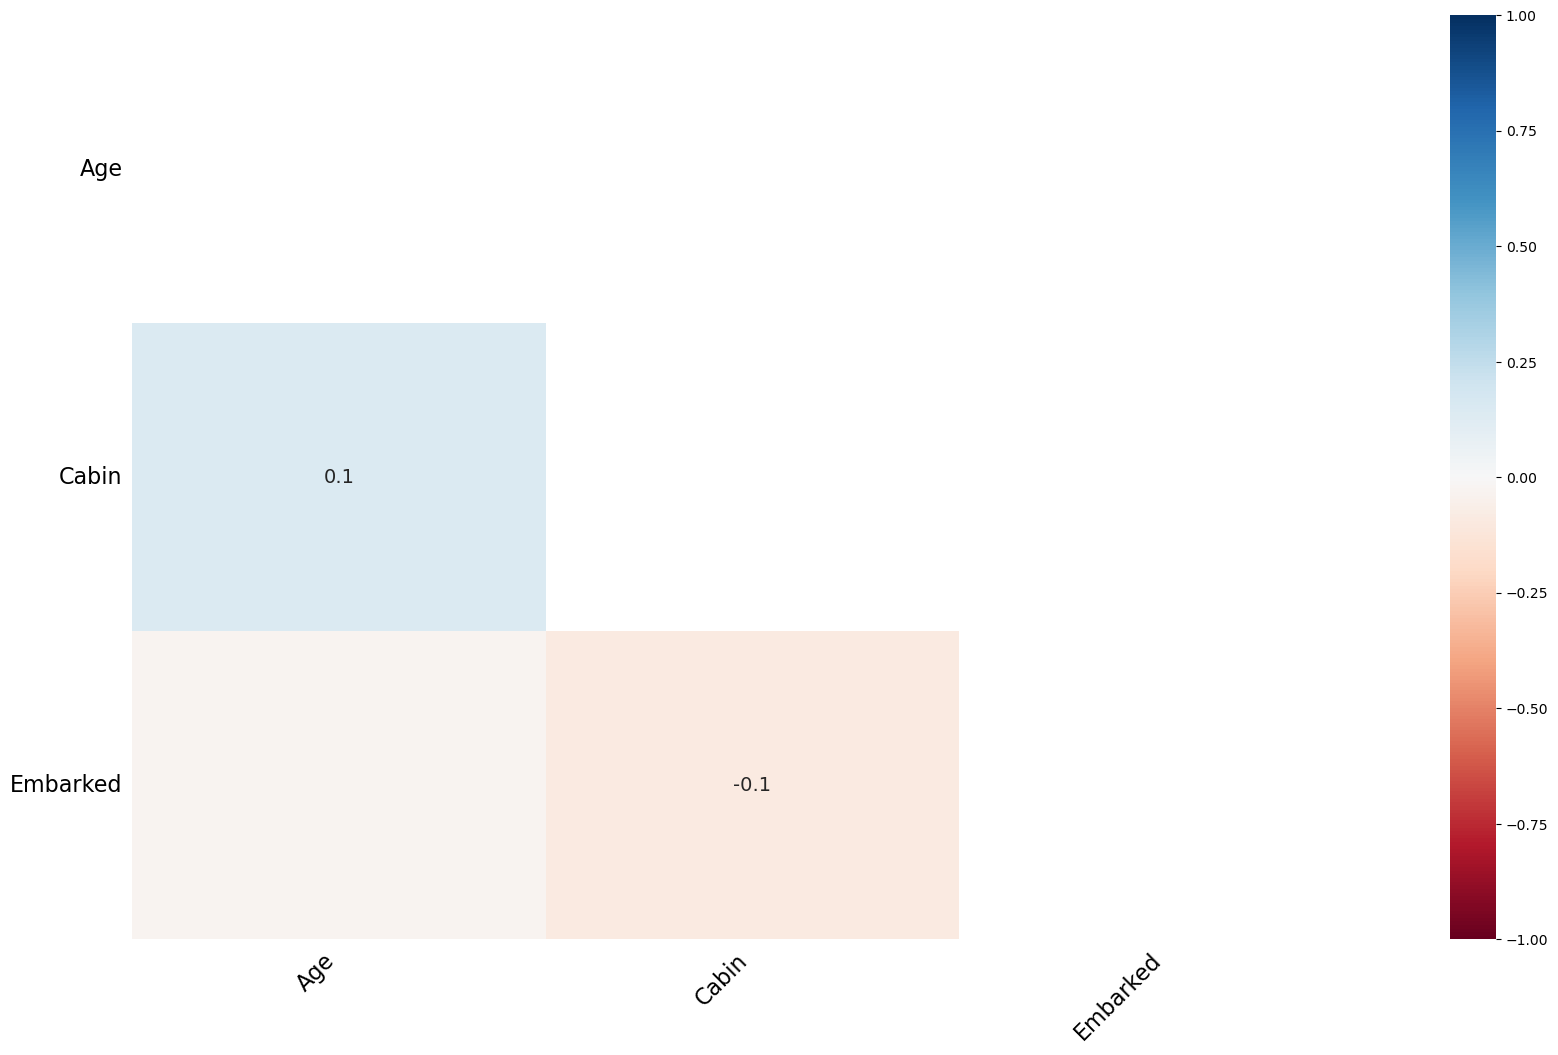

In [17]:
msno.heatmap(train)

In [18]:
train1=train.copy()

In [20]:
train2=train.copy()

In [19]:
train1.dropna().shape

(183, 12)

In [21]:
train2.dropna(subset=['Age']).shape

(714, 12)

In [23]:
train3=train.copy()

In [25]:
train3.dropna(how='all').shape #全部是缺失才是缺失 any只要有一个缺失就是缺失

(891, 12)

In [26]:
train3.dropna(axis=1).shape #删除有缺失值的列列

(891, 9)

# 填充缺失值

In [31]:
train.fillna(train['Age'].mean(),inplace=True) #填充均值

In [32]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [38]:
city_day=pd.read_csv(r'D:\BaiduNetdiskDownload\day4\city_day.csv',parse_dates=['Date'],index_col='Date')#解析日期，并设置为索引

In [41]:
city_day.isnull().sum()

City              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
city_day['Xylene'][50:64].fillna(method='bfill')#bfill后向填充 ffill前向填充

C:\Users\CYF\AppData\Local\Temp\ipykernel_26224\4287677926.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_day['Xylene'][50:64].fillna(method='bfill')


Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     1.32
2015-02-27     1.32
2015-02-28     1.32
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

<Axes: xlabel='Date'>

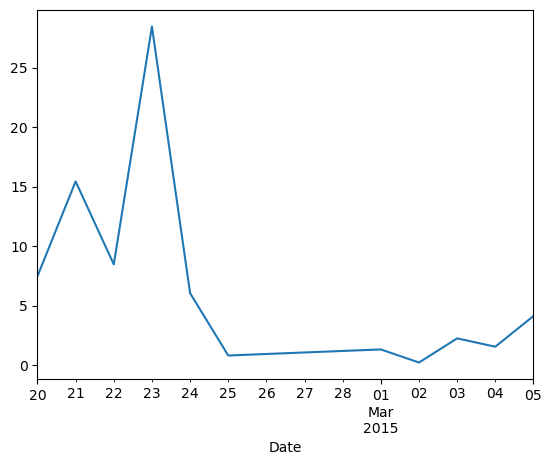

In [45]:
city_day['Xylene'][50:64].interpolate(limit_direction='both').plot()#线性插值